In [15]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pickle

In [16]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
# Specify the encoding when reading the CSV
data = pd.read_csv(fn, encoding='latin-1') # Or try 'ISO-8859-1', 'cp1252'

Saving spam.csv to spam (2).csv
User uploaded file "spam (2).csv" with length 503673 bytes


In [17]:
# Keep only relevant columns
data = data[['class', 'message']]

# Remove duplicate rows
data = data.drop_duplicates()

# Encode the 'class' column
label_encoder = LabelEncoder()
data['class'] = label_encoder.fit_transform(data['class'])  # 0: ham, 1: spam

Snapshot 1: Dataset after cleaning and label encoding:
   class                                            message
0      0  Go until jurong point, crazy.. Available only ...
1      0                      Ok lar... Joking wif u oni...
2      1  Free entry in 2 a wkly comp to win FA Cup fina...
3      0  U dun say so early hor... U c already then say...
4      0  Nah I don't think he goes to usf, he lives aro...


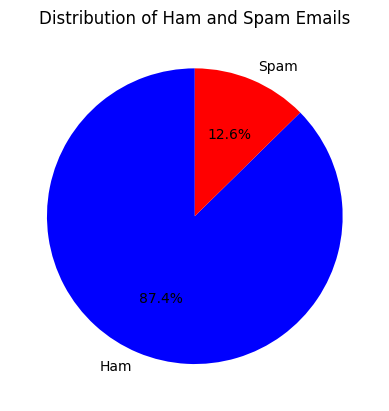

In [19]:
# Snapshot 1: Dataset Overview
print("Snapshot 1: Dataset after cleaning and label encoding:")
print(data.head())

# Visualizing Spam vs. Ham Distribution
spam_ham_counts = data['class'].value_counts()
labels = ['Ham', 'Spam']
plt.pie(spam_ham_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['blue', 'red'])
plt.title('Distribution of Ham and Spam Emails')
plt.savefig('snapshot1_piechart.png')
plt.show()

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data['message'], data['class'], test_size=0.2, random_state=42)

# Use TF-IDF Vectorizer to convert text to numerical data
tfidf = TfidfVectorizer(stop_words='english', max_features=3000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

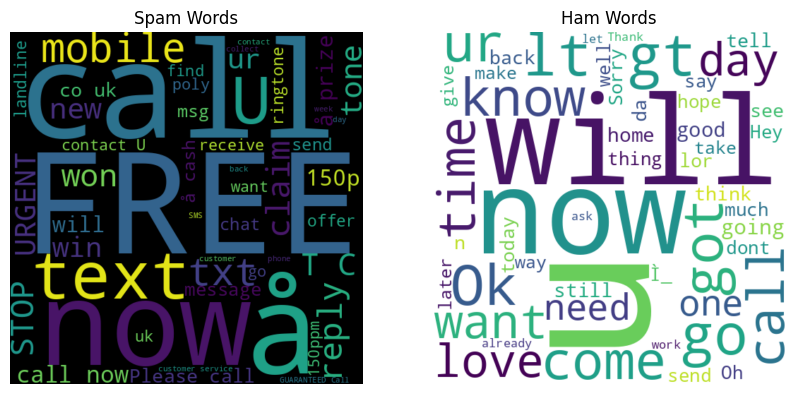

In [20]:
# Snapshot 2: Most Frequent Words Visualization
spam_words = ' '.join(data[data['class'] == 1]['message'])
ham_words = ' '.join(data[data['class'] == 0]['message'])
spam_wc = WordCloud(width=500, height=500, max_words=50, background_color='black').generate(spam_words)
ham_wc = WordCloud(width=500, height=500, max_words=50, background_color='white').generate(ham_words)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(spam_wc, interpolation='bilinear')
plt.title('Spam Words')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(ham_wc, interpolation='bilinear')
plt.title('Ham Words')
plt.axis('off')

plt.savefig('snapshot2_wordcloud.png')
plt.show()

# Build and train the Naive Bayes model
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

# Save the model and vectorizer using pickle
pickle.dump(model, open('spam_classifier_model.pkl', 'wb'))
pickle.dump(tfidf, open('tfidf_vectorizer.pkl', 'wb'))

# Make predictions
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [21]:
# Snapshot 3: Evaluation Metrics
print("Snapshot 3: Model Evaluation Metrics")
print(f'Accuracy: {accuracy:.2f}')
print('\nClassification Report:\n', report)
print('\nConfusion Matrix:\n', conf_matrix)

# Function for predicting new messages
def predict_message(message):
    processed_message = tfidf.transform([message])
    prediction = model.predict(processed_message)
    return 'Spam' if prediction[0] == 1 else 'Ham'


Snapshot 3: Model Evaluation Metrics
Accuracy: 0.97

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       889
           1       0.99      0.83      0.90       145

    accuracy                           0.97      1034
   macro avg       0.98      0.91      0.94      1034
weighted avg       0.98      0.97      0.97      1034


Confusion Matrix:
 [[888   1]
 [ 25 120]]


In [22]:
# Snapshot 4: Example Prediction
example_message = "Congratulations! You've won a $1000 gift card. Click here to claim it now."
prediction = predict_message(example_message)
print("Snapshot 4: Example Prediction")
print(f'Prediction for example message: {example_message} is {prediction}')

Snapshot 4: Example Prediction
Prediction for example message: Congratulations! You've won a $1000 gift card. Click here to claim it now. is Spam
